# Esercizio 1
 
Il peso corporeo e la pressione sistolica del sangue di 26 individui maschi selezionati in modo casuale nella fascia d’età che va da 25 a 30 anni sono mostrati in tabella. Assumiamo che il peso e la pressione sanguigna siano normalmente distribuiti. 
- 1 Si determini la retta di regressione.
- 2 Si calcolino gli intervalli di confidenza per i coefficienti di regressione.
- 3 Si testi la significatività della regressione usando α = 0.05.
- 4 Si calcoli il coefficiente di determinazione.

In [1]:
import numpy as np
from scipy.stats import f, norm, probplot, t
import matplotlib.pyplot as plt

## Punto 1

x_bar: 182.42
y_bar: 145.62
Sig2_x: 588.94
Sig_xy: 247.01
b0: 69.10
b1: 0.42


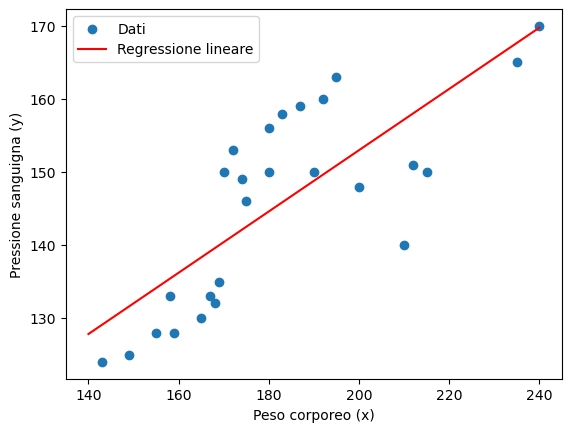

In [2]:
data = np.loadtxt("DATA_reg_lin.dat")

x = data[:, 1] 
y = data[:, 2] 
sig2 = 2
n = x.size

x_bar = np.mean(x)
print(f'x_bar: {round(x_bar, 2)}')

y_bar = np.mean(y)
print(f'y_bar: {round(y_bar, 2)}')

sig_x = np.sqrt(np.sum((x-x_bar)**2)/n)
print(f'Sig2_x: {sig_x**2:.2f}')

sig_xy = sum((x-x_bar)*(y-y_bar))/n
print(f'Sig_xy: {sig_xy:.2f}')

b0 = y_bar - sig_xy/(sig_x**2) * x_bar
print(f'b0: {b0:.2f}')

b1 = sig_xy/(sig_x**2)
print(f'b1: {b1:.2f}')


xx = np.linspace(140, 240, 1000)
Y = b0 + b1*xx 
plt.scatter(x, y, label='Dati')
plt.plot(xx, Y, color='red', label='Regressione lineare')

plt.xlabel('Peso corporeo (x)')
plt.ylabel('Pressione sanguigna (y)')
plt.legend()
plt.show()

## Punto 2

r: [ -8.30788127  -6.14671168   5.40089068  -6.11372924  -7.02039581
   3.4979667    1.20673865 -17.1815654   -4.98741337  -6.59723803
  -2.37197485  -4.98554208   9.59504271  11.75621231  -7.79139005
  -7.56612688   6.9173819   12.14264508  -9.27864142  12.10966264
  11.40089068  -5.08074681   0.23597851  -2.66694548  10.36790825
  11.46498426]


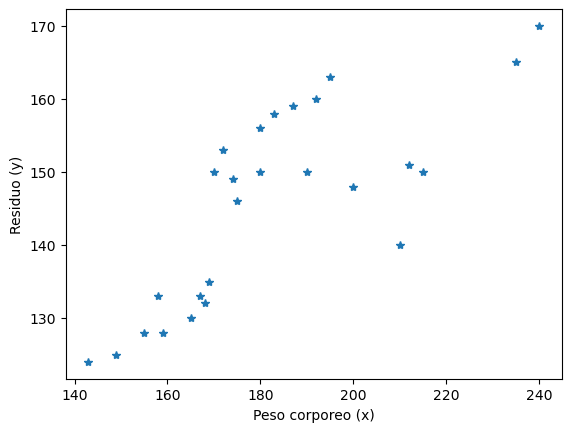

In [3]:
alpha = 0.05

y_hat = b0+b1*x
r = y-y_hat
print(f'r: {r}')

plt.plot(x, y, '*')
plt.xlabel('Peso corporeo (x)')
plt.ylabel('Residuo (y)')
plt.show()

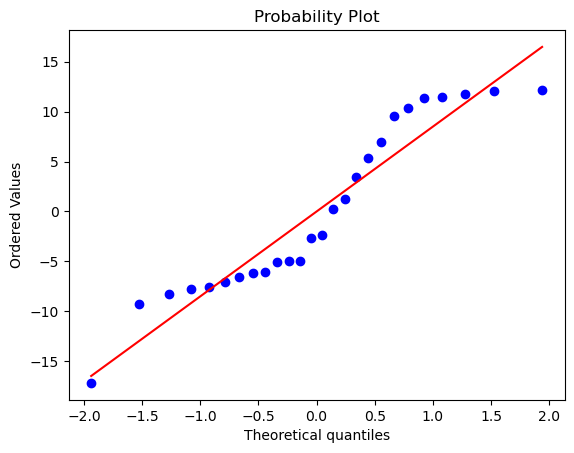

In [4]:
fig, ax = plt.subplots(1,1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [5]:
s = np.sqrt(np.sum(r**2)/n-2)
print(f's: {s:.2f}')

T = t.ppf(1-alpha/2, n-2)
print(f'T: {T:.2f}')

A = b0 - s*np.sqrt(1/n+(x_bar**2)/(n*sig_x**2)*T)
B = b0 + s*np.sqrt(1/n+(x_bar**2)/(n*sig_x**2)*T)
print(f'\nIntervallo di confidenza per b0: ]{round(A,2)}, {round(B,2)}[')

A = b1 - s/(sig_x*np.sqrt(n))*T
B = b1 + s/(sig_x*np.sqrt(n))*T
print(f'\nIntervallo di confidenza per b1: ]{round(A,2)}, {round(B,2)}[')

s: 8.22
T: 2.06

Intervallo di confidenza per b0: ]51.62, 86.59[

Intervallo di confidenza per b1: ]0.28, 0.56[


## Punto 3

In [8]:
# H0 -> b1 = 0
# H1 -> b1 != 0

cond = np.abs(np.sqrt(n)*b1/s*sig_x) >= T
print("Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%" if cond else "Non ho abbastanza elementi per rigettare l'ipotesi nulla")

Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 0.05%


## Punto 4

In [9]:
sig2_r = np.sum(r**2)/n
print(f'sig2_r: {sig2_r:.2f}')

sig2_f = sig_xy**2/sig_x**2
print(f'sig2_f: {sig2_f:.2f}')

sig2_y = sig2_f + sig2_r
print(f'sig2_y: {sig2_y:.2f}')

R2 = 1-sig2_r/sig2_y
print(f'Coefficiente di determinazione: {R2:.2f}')

if 1-R2 >= 0.20:
    print("Questo non è un buon modello")
else:
    print("Questo è un buon modello")

sig2_r: 69.56
sig2_f: 103.60
sig2_y: 173.16
Coefficiente di determinazione: 0.60
Questo non è un buon modello
